### Experiments

#### Import Libraries

In [1]:
from utils.data_utils import split_dataset, TimeSeriesDataset
from utils.evaluation_utils import plot_multistep_forecast, evaluate_on_test_data
from utils.training_utils import train
import pandas as pd 
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

/home/codespace/.python/current/lib/python3.10/site-packages/pytorch_forecasting/models/base_model.py:30: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


#### Import Data

In [43]:
ETTm2 = pd.read_csv("/workspaces/time_series_experiment/ETT-small/ETTm2.csv")
ETTm1 = pd.read_csv("/workspaces/time_series_experiment/ETT-small/ETTm1.csv")
ETTh1 = pd.read_csv("/workspaces/time_series_experiment/ETT-small/ETTh1.csv")
ETTh2 = pd.read_csv("/workspaces/time_series_experiment/ETT-small/ETTh2.csv")
training_df, val_df, test_df = split_dataset(ETTm2)

#### Univariate Case

#### Global Parameters

In [48]:
p_lag = 720
future_steps = round(720/2)
batch_size = 8
epochs = 8
learning_rate=1.e-4
decomp_kernel_size = 24
number_of_forecasts = 1
feature_columns = ['OT']
target_column = ['OT']

#### ETTm2

#### RLinear

Random seed set as 42
Rlinear activated
Current learning rate is : 0.0001
---------------------------
Current (running) training loss at iteration 5000 : 3.040426966571808
Current (running) training loss at iteration 10000 : 3.2625666648387908
Current (running) training loss at iteration 15000 : 3.465176940027873
Current (running) training loss at iteration 20000 : 3.0715228545963766
Current (running) training loss at iteration 25000 : 3.1065044490671156
Current (running) training loss at iteration 30000 : 3.9971719471494356

Epoch 0: 

Train metrics: -------
Running (training) loss is 3.9269622527352492.
Training MAE is 0.5309944004487374.
Training MSE is 3.985671164813255.
Training MAPE is 95180571.70549937.

Val metrics: -------
Running (validation) loss is 3.0369982326208658.
Validation MAE is 0.15189102274860453.
Validation MSE is 0.976062087246049.
Validation MAPE is 0.004678939173088021.
---------------------------
Current learning rate is : 5e-05
---------------------------
Cur

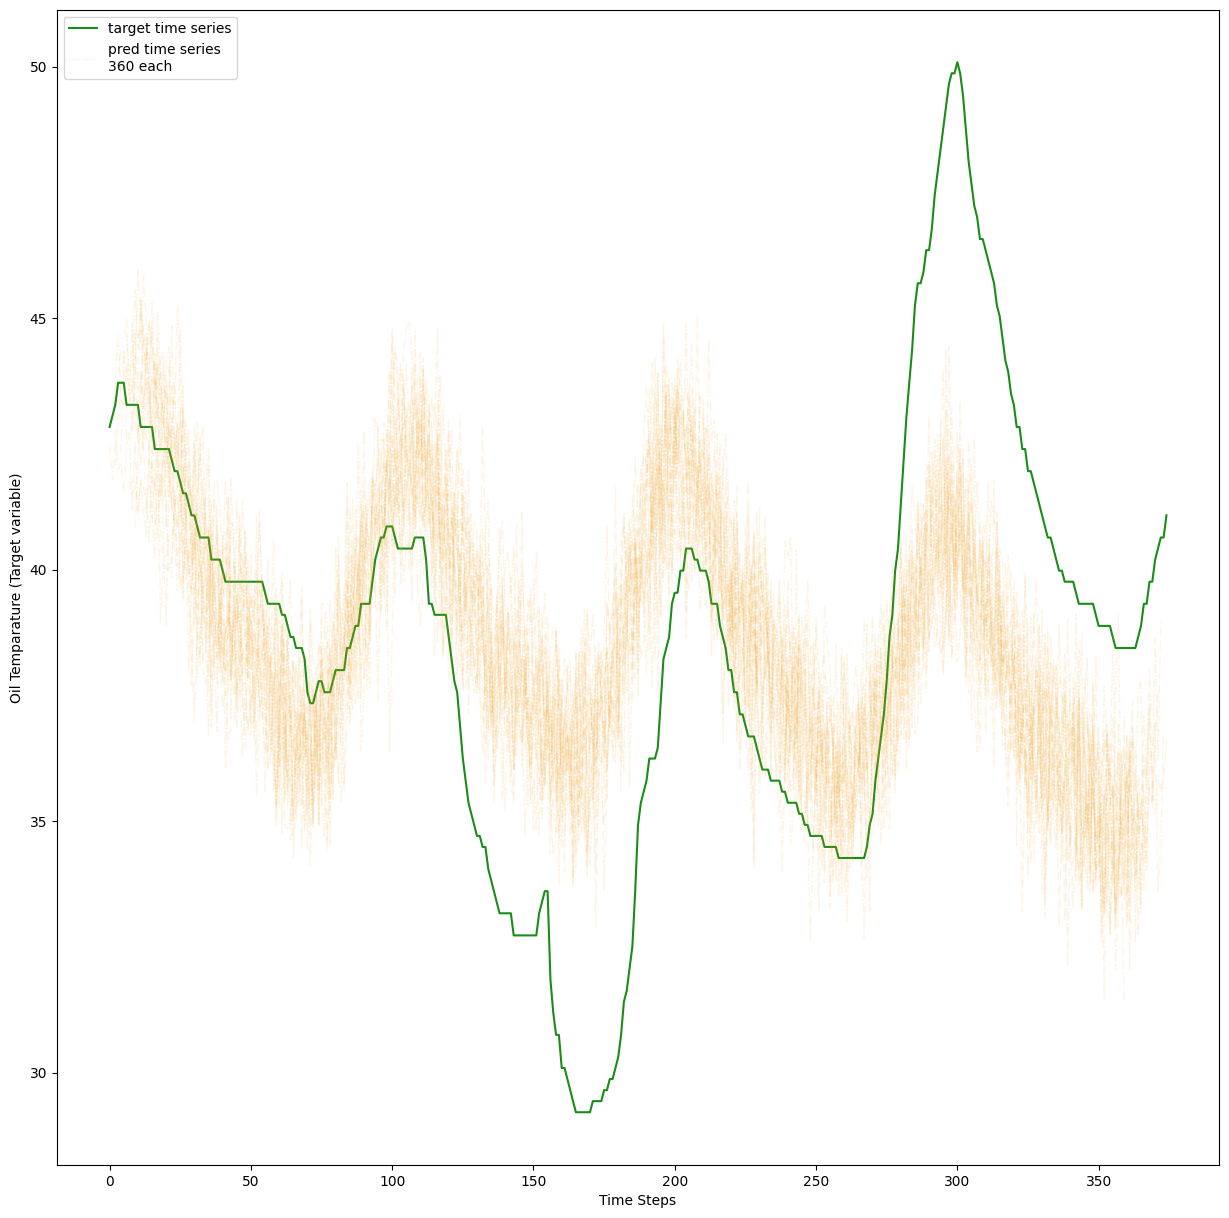

In [49]:
net, res = train(
            epochs = epochs, 
            n_features=len(feature_columns), 
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = val_df, 
            feature_columns = feature_columns,
            target_column = target_column, 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            get_residuals = True, 
            model = 'rlinear'
            )

test_data = DataLoader(TimeSeriesDataset(val_df,future_steps= future_steps, target_column = target_column,feature_columns=feature_columns,p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)
evaluate_on_test_data(test_data = test_data, neural_net = net)


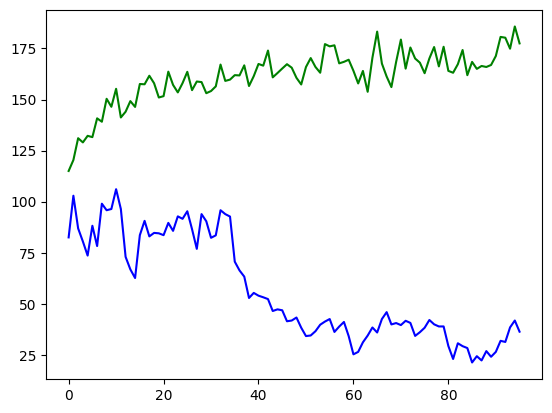

In [37]:
import matplotlib.pyplot as plt
neti = net.eval()
for i, (inputs, targets) in enumerate(test_data): 
    if i == 3: 
        break
    else: 
        output = neti(inputs)
        #print(output[1,:].tolist())
        #print(targets[1,0,:].tolist())

plt.plot(output[1,:].tolist(), 'g')
plt.plot(targets[1,0,:].tolist(), 'b')


#### Dlinear

In [50]:
net, res = train(
            epochs = epochs, 
            n_features=len(feature_columns), 
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = val_df, 
            feature_columns = feature_columns,
            target_column = target_column, 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            get_residuals = True, 
            model = 'dlinear'
            )

test_data = DataLoader(TimeSeriesDataset(val_df,future_steps= future_steps, target_column = target_column,feature_columns=feature_columns,p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)
evaluate_on_test_data(test_data = test_data, neural_net = net)

Random seed set as 42
Dlinear activated
Current learning rate is : 0.0001
---------------------------


NameError: name 'y_hat_trendd' is not defined

#### RLMP

Random seed set as 42
MinMaxLinear activated
Model running on 1 Layer
Current learning rate is : 0.0001
---------------------------
Current (running) training loss at iteration 5000 : 1.8531313858747482
Current (running) training loss at iteration 10000 : 1.875584024200961
Current (running) training loss at iteration 15000 : 1.6527430059840282
Current (running) training loss at iteration 20000 : 1.4533268256612122
Current (running) training loss at iteration 25000 : 1.4957825188508629
Current (running) training loss at iteration 30000 : 5.082959016576906

Epoch 0: 

Train metrics: -------
Running (training) loss is 4.775093267448801.
Training MAE is 0.39560556483475273.
Training MSE is 4.814940838661378.
Training MAPE is 68872267.55559804.

Val metrics: -------
Running (validation) loss is 189.01263531344904.
Validation MAE is 0.3124496196391315.
Validation MSE is 63.22534454275021.
Validation MAPE is 0.011026336168438273.
---------------------------
Current learning rate is : 5e-05
--

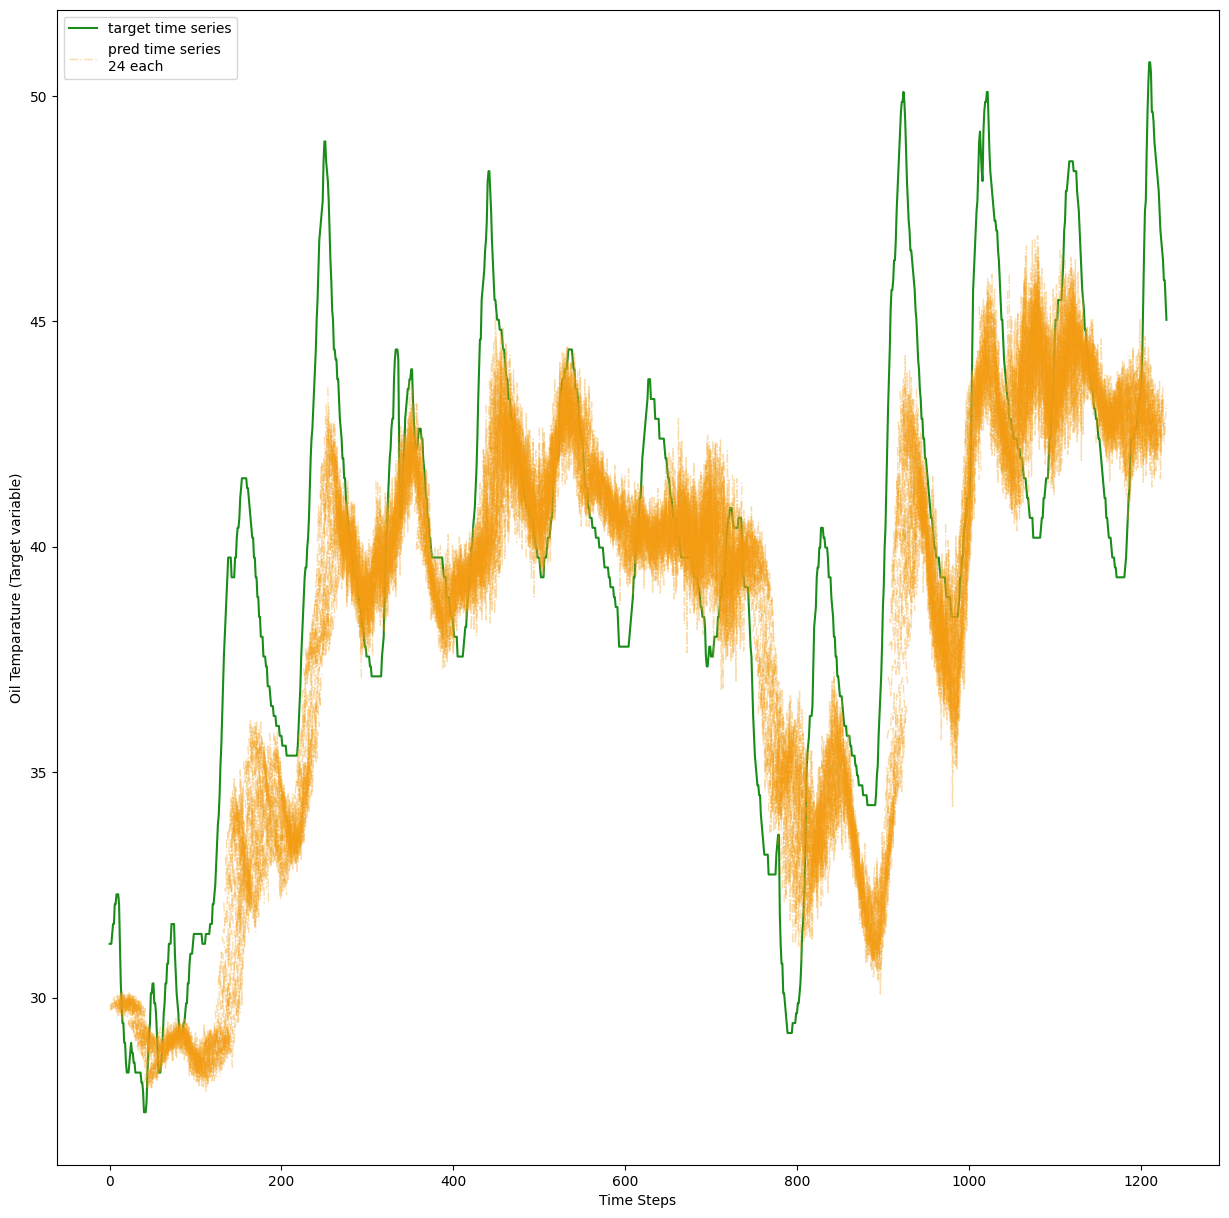

In [ ]:
net, res = train(
            epochs = epochs, 
            n_features=len(feature_columns), 
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = val_df, 
            feature_columns = feature_columns,
            target_column = target_column, 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            get_residuals = True, 
            model = 'rlmp'
            )

test_data = DataLoader(TimeSeriesDataset(val_df,future_steps= future_steps, target_column = target_column,feature_columns=feature_columns,p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)
evaluate_on_test_data(test_data = test_data, neural_net = net)